In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [81]:
# size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs, as x and z.
# We generate them randomly, drawing from an uniform distribution.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


## Generating Targets

In [82]:
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 3x - 4z + 7 + noise definition.
# In this way, we are basically saying: the weights should be 3 and 4, while the bias is 7.
targets = 3*xs - 4*zs + 7 + noise

print (targets.shape)

(1000, 1)


## Plot training data

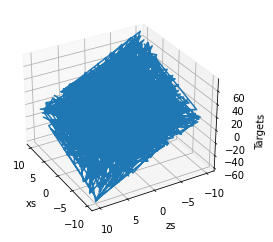

In [83]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
# Declare the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=150) 
plt.show()

targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)


## Initialize variables

In [84]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[0.05295208]
 [0.03041527]]
[-0.03442895]


In [85]:
learning_rate = 0.02

In [86]:
## Train the model

In [87]:
print(outputs.shape)

(1000, 1)


In [88]:
for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    deltas = outputs - targets
        
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print (loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

433.69289700347775
74.14994809930495
29.038291077277766
22.69757785893369
21.165504777201534
20.255794239051173
19.45131778274614
18.68720248094651
17.954367270400056
17.25065196635571
16.57479083707838
15.925667972841667
15.302223908332572
14.703442606300447
14.128348409821273
13.57600428090951
13.045510252573148
12.536001959833557
12.046649231042982
11.576654735197684
11.125252682794995
10.69170757808714
10.275313020694947
9.875390554628414
9.491288562838697
9.122381205500375
8.76806740029406
8.4277698430278
8.100934067001647
7.787027539582668
7.4855387945183605
7.195976598574813
6.9178691511416925
6.650763315499939
6.394223880499588
6.1478328514448455
5.9111887690308835
5.68390605522272
5.46561438501042
5.255958083016872
5.054595543975143
4.861198676131022
4.675452366663979
4.497053968255392
4.325712805967619
4.1611497036303025
4.003096528962334
3.85129575668825
3.7055000489372607
3.5654718522411804
3.4309830104746886
3.3018143931072217
3.1777555381607874
3.058604309291969
2.9441665

In [89]:
print (weights, biases)

[[ 3.00314037]
 [-3.99852348]] [6.06905288]


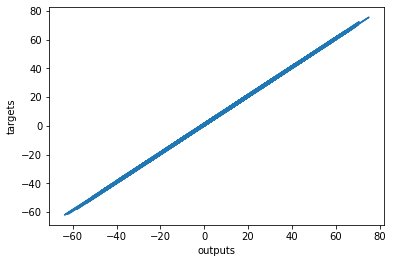

In [90]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()